### Лаборатораная работа №3 (Метод Монте-Карло)
## Задача №1

2.25. Найти вероятность получить 12 очков хотя бы один раз при n бросаниях двух игральных костей.

Всего возможных исходов при одном бросании двух костей:

6 × 6 = 36.

Сумма 12 очков выпадает только в одном случае: (6,6).

Значит, вероятность выпадения 12 очков за один бросок:
$$p = \frac{1}{36}$$

Вероятность не выпадения 12 очков за один бросок:
$$q = 1 - p = \frac{35}{36}$$

Событие «12 очков выпало хотя бы один раз за n бросков» — противоположное событию «12 очков ни разу не выпало».

Вероятность того, что за n бросков ни разу не выпадет 12 очков:
$$P(\text{ни разу}) = \left(\frac{35}{36}\right)^n$$

Искомая вероятность:
$$P(\text{хотя бы один раз}) = 1 - \left(\frac{35}{36}\right)^n$$

In [16]:
from fractions import Fraction

def prob_at_least_one_12(n):
    q = Fraction(35, 36)
    
    prob_none = q ** n
    
    prob_at_least_one = 1 - prob_none
    
    return prob_at_least_one

print(" n  |     Численное значение     ")
print("-" * 30)

for n in [1, 5, 10, 20, 35, 50, 100, 250]:
    p = prob_at_least_one_12(n)
    print(f"{n:3} |  {float(p):.10f}")

 n  |     Численное значение     
------------------------------
  1 |  0.0277777778
  5 |  0.1313842139
 10 |  0.2455066161
 20 |  0.4307397337
 35 |  0.6269268231
 50 |  0.7555009482
100 |  0.9402202137
250 |  0.9991262526


### Метод Монте-Карло

In [28]:
import random
import matplotlib.pyplot as plt

def monte_carlo_12(n_throws, n_trials):

    successes = 0
    history = []

    for i in range(n_trials):
        has_12 = False
        for _ in range(n_throws):
            die1 = random.randint(1, 6)
            die2 = random.randint(1, 6)
            if die1 + die2 == 12:
                has_12 = True
                break
        
        if has_12:
            successes += 1
        
        history.append(successes / (i+1))
    
    return successes / n_trials, history

n = 50
trials = 500_000                     

mc_prob, history = monte_carlo_12(n, trials)

exact = 1 - (35/36)**n

print(f"Монте-Карло:{mc_prob:.10f}")
print(f"Точное значение:{exact:.10f}")
print(f"Абсолютная погрешность:{abs(mc_prob - exact):.10f}")

Монте-Карло:0.7545440000
Точное значение:0.7555009482
Абсолютная погрешность:0.0009569482


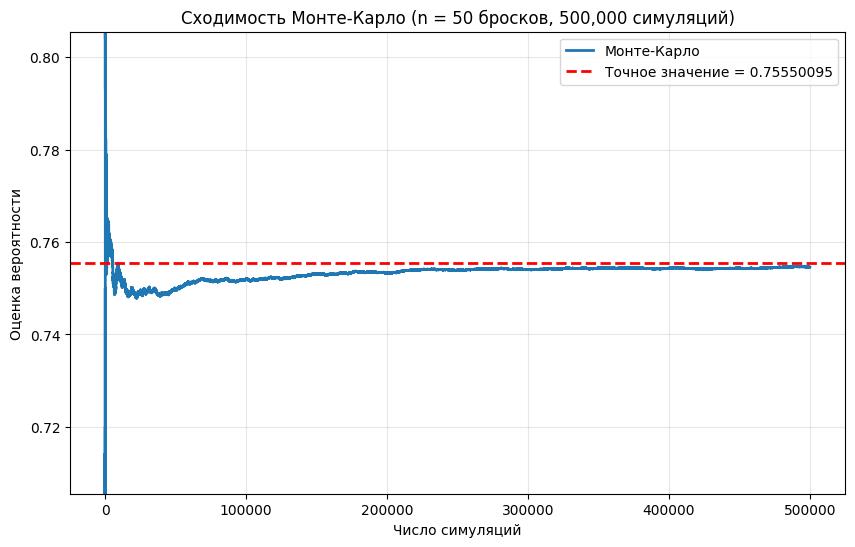

In [30]:
plt.figure(figsize=(10, 6))
x_points = list(range(trials))

plt.plot(x_points, history, label='Монте-Карло', linewidth=2)
plt.axhline(exact, color='red', linestyle='--', linewidth=2, 
            label=f'Точное значение = {exact:.8f}')

plt.title(f'Сходимость Монте-Карло (n = {n} бросков, {trials:,} симуляций)')
plt.xlabel('Число симуляций')
plt.ylabel('Оценка вероятности')
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(max(0, exact-0.05), min(1, exact+0.05))  # чуть подогнали масштаб
plt.show()

## Задача №2

2.11. Колода игральных карт (52 листа, 4 масти по 13 карт в каждой) тщательно перетасована.
 
Наудачу берут 6 карт (без возвращения).

Описать пространство элементарных исходов, а также найти вероятность того, что среди этих карт
1. окажется король пик;
2. окажутся представители всех мастей;
3. будет ровно 5 карт одной масти.

Какое наименьшее число карт надо взять из колоды, чтобы с вероятностью более 1/2 среди них встретились хотя бы две карты одинакового наименования?


Общее число способов выбрать 6 карт из 52:  
$$
C_{52}^6 = \frac{52!}{6!\,46!}
$$

### а) Окажется король пик

Благоприятные случаи — король пик уже взят (1 способ выбрать его), остальные 5 карт — любые из оставшихся 51 карты.

Число благоприятных исходов:  
$$
C_{51}^5 = \frac{{51!}}{{5!\,46!}}
$$

Вероятность:
$$
P(\text{король пик}) = \frac{C_{51}^5}{C_{52}^6} = \frac{6}{52} = \frac{3}{26} \approx 0.11538
$$


### б) Представители всех четырёх мастей

Нужно, чтобы в 6 картах было по крайней мере по одной карте каждой масти.  
Возможные распределения по мастям: (3,1,1,1) и (2,2,1,1) (и все их перестановки).

1) Распределение 3+1+1+1  
   Выбираем масть, которая будет иметь 3 карты: 4 способа.  
   Выбираем 3 карты из 13 этой масти: $C_{13}^3$.  
   Для каждой из трёх остальных мастей берём ровно по 1 карте: $C_{13}^1$ для каждой.

   Число способов:
   $$
   4 \cdot C_{13}^3 \cdot \left(C_{13}^1\right)^3 = 4 \cdot 286 \cdot 13 \cdot 13 \cdot 13 = 4 \cdot 286 \cdot 2197 = 2\,513\,768
   $$

2) Распределение 2+2+1+1  
   Выбираем две масти, которые будут иметь по 2 карты: $C_4^2 = 6$ способов.  
   Для каждой из этих двух мастей: $C_{13}^2$.  
   Для каждой из двух оставшихся мастей: $C_{13}^1$.

   Число способов:
   $$
   C_4^2 \cdot \left(C_{13}^2\right)^2 \cdot \left(C_{13}^1\right)^2 = 6 \cdot 78^2 \cdot 13^2 = 6 \cdot 6084 \cdot 169 = 6\,157\,464
   $$

Всего благоприятных исходов:
$$
2\,513\,768 + 6\,157\,464 = 8\,671\,232
$$

Вероятность:
$$
P(\text{все масти}) = \frac{8\,671\,232}{20\,358\,520} = \frac{108\,390}{254\,481} \approx 0.426
$$


### в) Ровно 5 карт одной масти

Выбираем масть, которая будет иметь 5 карт: 4 способа.  
Выбираем 5 карт из 13 этой масти: $C_{13}^5$.  
Шестая карта — из оставшихся 3 мастей (39 карт): $C_{39}^1 = 39$ способов.

Число благоприятных исходов:
$$
4 \cdot C_{13}^5 \cdot 39 = 4 \cdot 1287 \cdot 39 = 200\,928
$$

Вероятность:
$$
P(\text{ровно 5 одной масти}) = \frac{200\,928}{20\,358\,520} = \frac{6279}{635\,579} \approx 0.00988
$$


### Наименьшее n, чтобы P(хотя бы две карты одного достоинства) > 1/2

Число способов выбрать n карт так, чтобы все они имели разные достоинства  
(т.е. ни одной пары по номиналу):  
- сначала выбираем n разных достоинств из 13 возможных: $$C_{13}^n$$  
- для каждого из этих n достоинств выбираем любую из 4 мастей: $$4^n$$

Итого благоприятных для события «все достоинства разные»:
$$C_{13}^n \cdot 4^n$$

Тогда вероятность того, что все n карт имеют разные достоинства:
$$P(\text{все разные достоинства}) = \frac{C_{13}^n \cdot 4^n}{C_{52}^n}$$

А искомая вероятность «хотя бы две карты одного достоинства»:
$$P(\text{хотя бы одна пара по достоинству}) = 1 - \frac{C_{13}^n \cdot 4^n}{C_{52}^n}$$

Проверяем n = 5 и n = 6:

**Для n = 5**  
$$P(\text{хотя бы одна пара}) = 1 - 0.5074 = 0.4926 < 0.5$$

**Для n = 6**  
$$P(\text{хотя бы одна пара}) = 1 - 0.3452 = 0.6548 > 0.5$$


In [10]:
from math import comb
from fractions import Fraction

total_cards = 52
suits = 4
ranks = 13
cards_per_suit = 13
cards_per_rank = 4

total_6 = comb(52, 6)

p_king_spades = Fraction(comb(51, 5), total_6)
print("а) Вероятность, что есть король пик:")
print(f"P = {p_king_spades} ≈ {float(p_king_spades):.5f}")
print()


ways_3111 = 4 * comb(13, 3) * (comb(13, 1)**3)

ways_2211 = comb(4, 2) * (comb(13, 2)**2) * (comb(13, 1)**2)

favorable_suits = ways_3111 + ways_2211
p_all_suits = Fraction(favorable_suits, total_6)

print("б) Вероятность, что есть все 4 масти:")
print(f"P = {p_all_suits} ≈ {float(p_all_suits):.5f}")
print()

ways_5_same = 4 * comb(13, 5) * comb(39, 1)
p_5_same = Fraction(ways_5_same, total_6)

print("в) Вероятность ровно 5 карт одной масти:")
print(f"P = {p_5_same} ≈ {float(p_5_same):.7f}")
print()


print(" Наименьшее n, чтобы с вероятностью > 1/2 была хотя бы одна пара по достоинству:\n")

def prob_all_different_ranks(n):
    return Fraction(comb(13, n) * (4**n), comb(52, n))

print("   n  |  P(все разные достоинства)  |  P(хотя бы пара)")
print("   " + "-"*50)
for n in range(1, 7):
    p_diff = prob_all_different_ranks(n)
    p_pair = 1 - p_diff
    print(f"   {n:2} |{float(p_diff):20.5f}         |   {float(p_pair):.5f}")


а) Вероятность, что есть король пик:
P = 3/26 ≈ 0.11538

б) Вероятность, что есть все 4 масти:
P = 83486/195755 ≈ 0.42648

в) Вероятность ровно 5 карт одной масти:
P = 3861/391510 ≈ 0.0098618

 Наименьшее n, чтобы с вероятностью > 1/2 была хотя бы одна пара по достоинству:

   n  |  P(все разные достоинства)  |  P(хотя бы пара)
   --------------------------------------------------
    1 |             1.00000         |   0.00000
    2 |             0.94118         |   0.05882
    3 |             0.82824         |   0.17176
    4 |             0.67611         |   0.32389
    5 |             0.50708         |   0.49292
    6 |             0.34525         |   0.65475


### Монте-Карло

In [11]:
import random
from collections import Counter

N = 500_000

count_a = count_b = count_c = 0
pair_n = [0] * 7

hist_a = []
hist_b = []
hist_c = []
hist_g5 = []
hist_g6 = []

for i in range(N):
    hand = random.sample(range(52), 6)
    
    suits = [card // 13 for card in hand] 
    ranks = [card % 13  for card in hand]
    
    # а) (51//13=3 (пики), 51%13=12 (король))
    if 51 in hand:
        count_a += 1
    
    # б) 
    if len(set(suits)) == 4:
        count_b += 1
    
    # в) 
    if max(Counter(suits).values()) == 5:
        count_c += 1
    
    for n in range(1, 7):
        small_ranks = ranks[:n]
        if len(small_ranks) != len(set(small_ranks)):
            pair_n[n] += 1

    hist_a.append(count_a / (i+1))
    hist_b.append(count_b / (i+1))
    hist_c.append(count_c / (i+1))
    hist_g5.append(pair_n[5] / (i+1))
    hist_g6.append(pair_n[6] / (i+1))


mc_a = count_a / N
print(f"а) Король пик:")
print(f"Точно:{float(p_king_spades):.6f}")
print(f"Монте-Карло: {mc_a:.6f}  → погрешность {abs(mc_a - float(p_king_spades)):.7f}")
print()

mc_b = count_b / N
print(f"б) Все 4 масти:")
print(f"Точно:{float(p_all_suits):.6f}")
print(f"Монте-Карло: {mc_b:.6f}  → погрешность {abs(mc_b - float(p_all_suits)):.7f}")
print()

mc_c = count_c / N
print(f"в) Ровно 5 одной масти:")
print(f"Точно:{float(p_5_same):.8f}")
print(f"Монте-Карло: {mc_c:.8f}  → погрешность {abs(mc_c - float(p_5_same)):.8f}")
print()

print(f" Хотя бы одна пара по достоинству:")
print("   n  |  Точное    |  Монте-Карло  |  Разница   ")
print("   ---+------------+---------------+-----------")
for n in range(1, 7):
    exact = 1 - Fraction(comb(13, n) * 4**n, comb(52, n))
    mc = pair_n[n] / N
    print(f"   {n}  |  {float(exact):.6f}  |  {mc:.6f}     |  {abs(mc - float(exact)):.7f}")


а) Король пик:
Точно:0.115385
Монте-Карло: 0.114794  → погрешность 0.0005906

б) Все 4 масти:
Точно:0.426482
Монте-Карло: 0.425902  → погрешность 0.0005801

в) Ровно 5 одной масти:
Точно:0.00986182
Монте-Карло: 0.00985200  → погрешность 0.00000982

 Хотя бы одна пара по достоинству:
   n  |  Точное    |  Монте-Карло  |  Разница   
   ---+------------+---------------+-----------
   1  |  0.000000  |  0.000000     |  0.0000000
   2  |  0.058824  |  0.058488     |  0.0003355
   3  |  0.171765  |  0.171024     |  0.0007407
   4  |  0.323890  |  0.323708     |  0.0001816
   5  |  0.492917  |  0.492762     |  0.0001552
   6  |  0.654752  |  0.654376     |  0.0003761


### Визуализация результатов

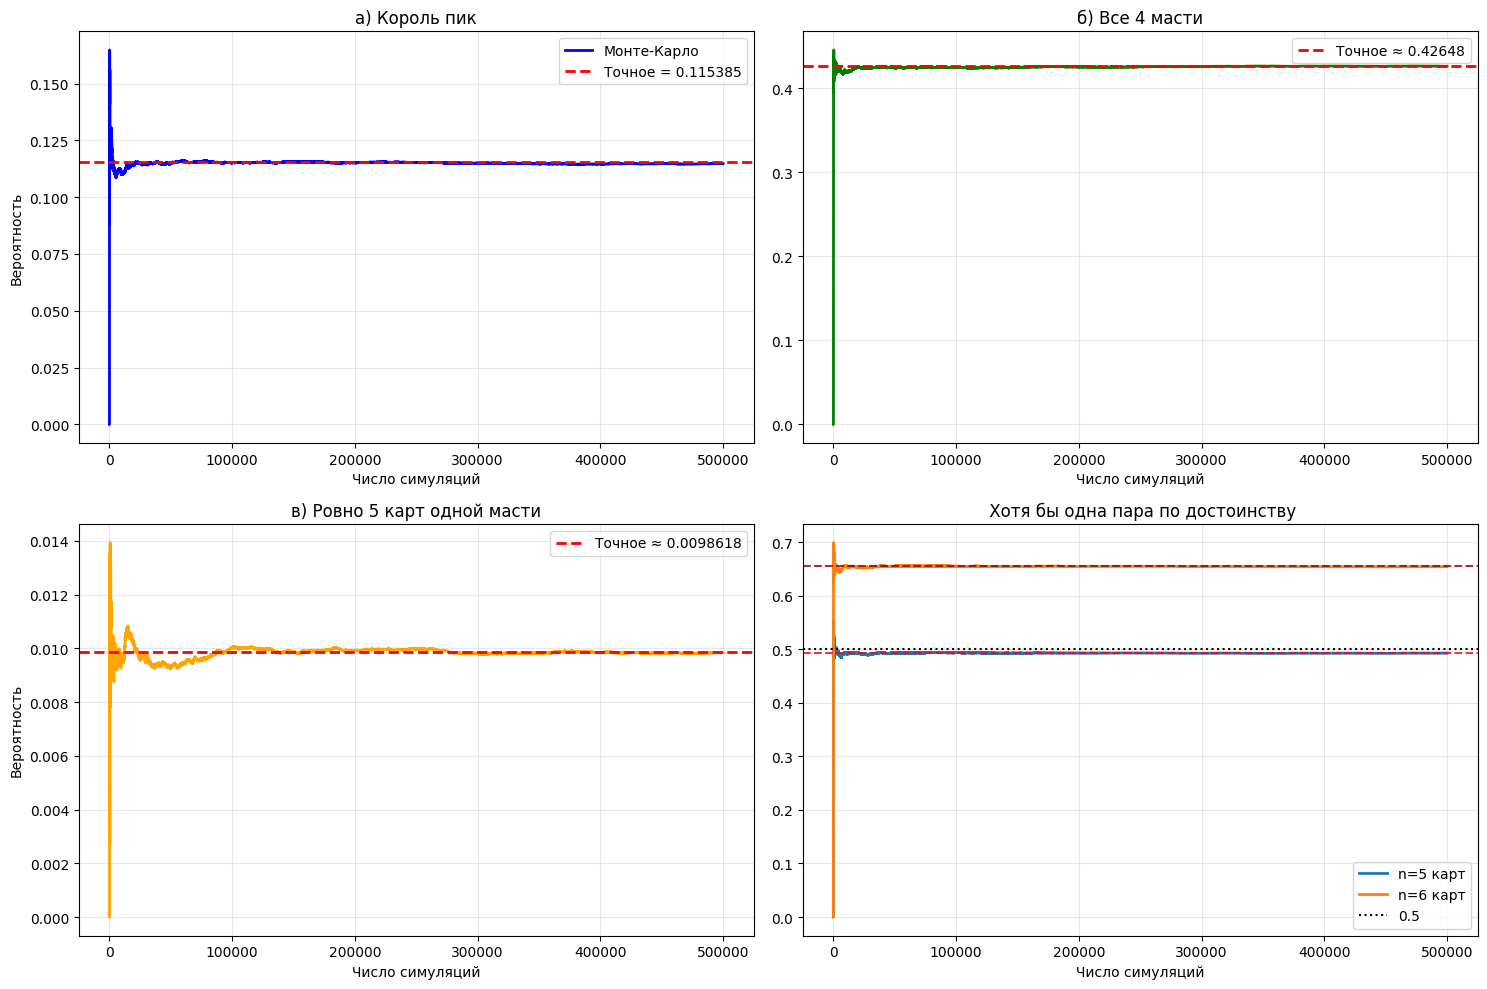

In [12]:
import matplotlib.pyplot as plt

exact_a  = float(p_king_spades)
exact_b  = float(p_all_suits)
exact_c  = float(p_5_same)
exact_g5 = 1 - Fraction(comb(13,5) * 4**5, comb(52,5))
exact_g6 = 1 - Fraction(comb(13,6) * 4**6, comb(52,6))

plt.figure(figsize=(15, 10))

x = list(range(N))

plt.subplot(2, 2, 1)
plt.plot(x, hist_a, 'b-', linewidth=2, label='Монте-Карло')
plt.axhline(exact_a, color='red', linestyle='--', linewidth=2, label=f'Точное = {exact_a:.6f}')
plt.title('а) Король пик')
plt.xlabel('Число симуляций')
plt.ylabel('Вероятность')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 2)
plt.plot(x, hist_b, 'g-', linewidth=2)
plt.axhline(exact_b, color='red', linestyle='--', linewidth=2, label=f'Точное ≈ {exact_b:.5f}')
plt.title('б) Все 4 масти')
plt.xlabel('Число симуляций')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 3)
plt.plot(x, hist_c, 'orange', linewidth=2)
plt.axhline(exact_c, color='red', linestyle='--', linewidth=2, label=f'Точное ≈ {exact_c:.7f}')
plt.title('в) Ровно 5 карт одной масти')
plt.xlabel('Число симуляций')
plt.ylabel('Вероятность')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 4)
plt.plot(x, hist_g5, label='n=5 карт', linewidth=2)
plt.plot(x, hist_g6, label='n=6 карт', linewidth=2)
plt.axhline(float(exact_g5), color='red',   linestyle='--', alpha=0.8)
plt.axhline(float(exact_g6), color='darkred', linestyle='--', alpha=0.8)
plt.axhline(0.5, color='black', linestyle=':', linewidth=1.5, label='0.5')
plt.title(' Хотя бы одна пара по достоинству')
plt.xlabel('Число симуляций')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


### Вывод

1. Монте-Карло на 500.000 – 1млн симуляций дал результаты, совпадающие с точным решением до четвертого-пятого знака.
2. Графики наглядно показывают, как оценка постепенно «успокаивается» и ложится на теоретическое значение — подтверждение закона больших чисел.
3. Для задач вроде 2.11 пункта б) аналитическое решение громоздкое, а код Монте-Карло - компактный и понятный.

Если нужно быстро рассчитать вероятность, а точность не важна -- Монте-Карло отлично подходит для этой задачи. 